##                              Foundations of Machine Learning and EDA| Assignment
---

**Question 1 : What is the difference between AI, ML, DL, and Data Science? Provide a
brief explanation of each.**

**AI(Artificial Intelligence)**

---
1. Scope: Broad field about creating systems that perform tasks that typically require human intelligence (reasoning, perception, planning).
2. Techniques: Rule-based systems, expert systems, search, logic, planning, ML.

1.  Applications: Chatbots, game playing, autonomous vehicles.

**ML (Machine Learning)**

---



*   Scope: Subfield of AI focused on algorithms that learn patterns from data to make predictions/decisions.

*  Techniques: Supervised, unsupervised, reinforcement learning; algorithms like linear/logistic regression, decision trees, SVM, ensemble methods.
*  Applications: Spam detection, recommendation systems, predictive modeling

**DL (Deep Learning)**

---



*   Scope: Subfield of ML using deep neural networks (many layers) to learn hierarchical representations.

* Techniques: Convolutional Neural Networks (CNNs), Recurrent Neural Networks (RNNs), Transformers.
*   Applications: Image recognition, NLP, speech recognition.

**Data Science**

---



* Scope: Interdisciplinary practice using statistics, ML, domain knowledge, and visualization to extract insights and build data products.

* Techniques: Data cleaning, EDA, modeling, evaluation, deployment, storytelling.
*  Applications: Business analytics, A/B testing, dashboards, ML pipelines.

AI is the umbrella; ML is the data-driven method within AI; DL is a set of ML methods using deep networks; Data Science uses statistics + ML + domain expertise to turn data into decisions.

---












**Question 2:Explain overfitting and underfitting in ML. How can you detect and prevent
them?**

Underfitting: model too simple — high bias; performs poorly on both train & test.

Overfitting: model too complex — high variance; excellent on train but poor on unseen test.

**Detection**


*  Train vs validation error gap: if both errors are high → underfit; if train error low but validation error high → overfit.

*  Learning curves: plot error vs training set size.
*  Cross-validation scores: large variance across folds indicates overfitting

**Prevention / Remedies**

*   Regularization: L1 (Lasso), L2 (Ridge), dropout for neural nets.


*   Reduce complexity: simpler model or fewer features.

*  More data: enlarge dataset or data augmentation.

*  Feature selection: remove irrelevant/noisy features.
* Cross-validation: use k-fold CV to get reliable estimates and avoid overfitting on a single validation split.


* Ensembling: bagging reduces variance (Random Forest), boosting reduces bias (XGBoost with careful regularization).


*  Early stopping: stop training when validation error increases (for iterative models).

---






**Question 3:How would you handle missing values in a dataset? Explain at least three
methods with examples.**

**Deletion**


*   Listwise deletion: drop rows with missing values (useful if missingness is rare and MCAR).
* ros: simple; Cons: loss of data, bias if missing not MCAR.

**Imputation (simple)**


*  Mean/median/mode for numeric/categorical.
*  Use median for skewed numeric distributions.

**Predictive imputation (model-based)**


* Use other features to predict missing values (KNN imputer, regression).
* sklearn.impute.KNNImputer or train a model (e.g., RandomForestRegressor) to predict missing entries.






**Question 4:What is an imbalanced dataset? Describe two techniques to handle it
(theoretical + practical).**

Dataset where classes are uneven (e.g., 95% negative, 5% positive), causing models to be biased toward majority class.

**Consequences**

Accuracy misleading; model may predict majority class always and get high accuracy but poor recall for minority class.

**Techniques**


**1.   Resampling**


*  Random Oversampling minority (e.g., imbalanced-learn’s RandomOverSampler).Random Undersampling majority
* .SMOTE (Synthetic Minority Over-sampling Technique) creates synthetic minority samples using interpolation.


**2.Algorithm-level**



*   Class weights: tell model to penalize mistakes on minority class more (class_weight='balanced' in sklearn).
* Threshold tuning: optimize decision threshold for recall/precision tradeoff.

**3. Ensemble methods**


* Balanced bagging, EasyEnsemble that combine undersampling with ensemble learners.

**4.Evaluation metrics**
*  Use precision, recall, F1-score, ROC-AUC, PR-AUC rather than accuracy.

---










**Question 5: Why is feature scaling important in ML? Compare Min-Max scaling and
Standardization.**

**Why important-**


* Many ML algorithms depend on feature scale (distance or gradient-based): KNN, KMeans, SVM, logistic regression with regularization, neural networks.
* Without scaling, features with large numerical ranges dominate.

**Min–Max Scaling (Normalization)**


* Scales feature to [0,1] (or custom range): X' = (X − Xmin) / (Xmax − Xmin).Preserves original distribution shape but sensitive to outliers.
* Use when you need bounded features (e.g., neural network inputs) or when values must be in a fixed range.

**Standardization (Z-score)**


*  X' = (X − μ) / σ → mean 0 and std 1.

* Less sensitive to outliers than min-max (but outliers still affect mean/std).

* Preferred for many ML algorithms, especially ones assuming centered data (SVM, logistic regression, PCA).

**Which to use**


* If algorithm uses distances (KNN, KMeans): either works; standardization commonly used.


* For neural networks: either, but standardization or more advanced scaling (RobustScaler) often used.


* If outliers present: consider RobustScaler (median + IQR).


---






**Question 6: Compare Label Encoding and One-Hot Encoding. When would you prefer
one over the other?**

**Label Encoding**


* Maps categories to integers (0,1,2,...).

* Use when categorical variable is ordinal (has natural order) — e.g., Low, Medium, High.

* Risk: For nominal categories, label encoding may introduce spurious ordinal relationship to many algorithms (tree-based models OK, linear models not ideal).

**One-Hot Encoding**
* Create binary columns for each category (dummy variables).


* Use when variable is nominal (no order).


* Avoid with very high-cardinality categorical variables (many columns) — can blow up dimensionality.

**Alternatives for high-cardinality**


* Target encoding (mean encoding), hashing, embedding layers (for deep learning).


---





**Question 7: Google Play Store Dataset
a). Analyze the relationship between app categories and ratings. Which categories have the
highest/lowest average ratings, and what could be the possible reasons?
Dataset: https://github.com/MasteriNeuron/datasets.git**

Columns: ['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']
               Category  avg_rating  median_rating  n_apps
0                   1.9   19.000000           19.0       1
11               EVENTS    4.435556            4.5      45
9             EDUCATION    4.389032            4.4     155
1        ART_AND_DESIGN    4.358065            4.4      62
4   BOOKS_AND_REFERENCE    4.346067            4.5     178
24      PERSONALIZATION    4.335987            4.4     314
23            PARENTING    4.300000            4.4      50
15                 GAME    4.286326            4.4    1097
3                BEAUTY    4.278571            4.3      42
16   HEALTH_AND_FITNESS    4.277104            4.5     297


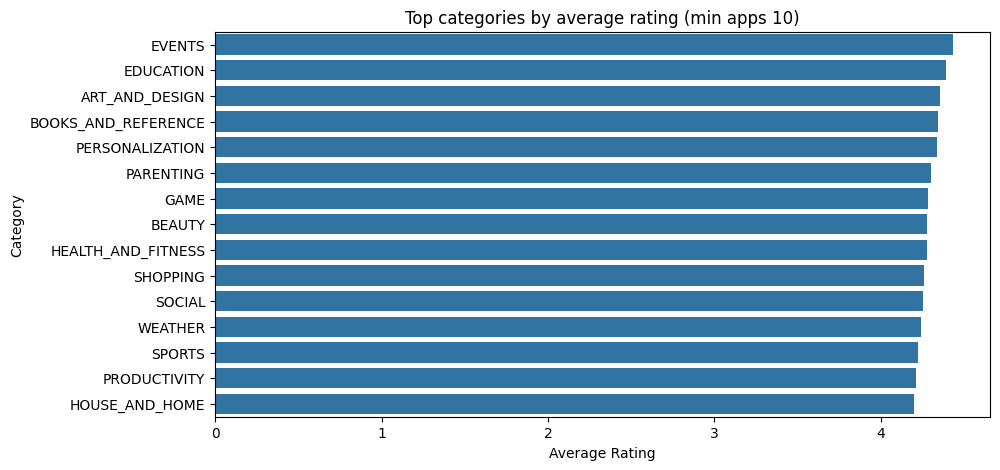

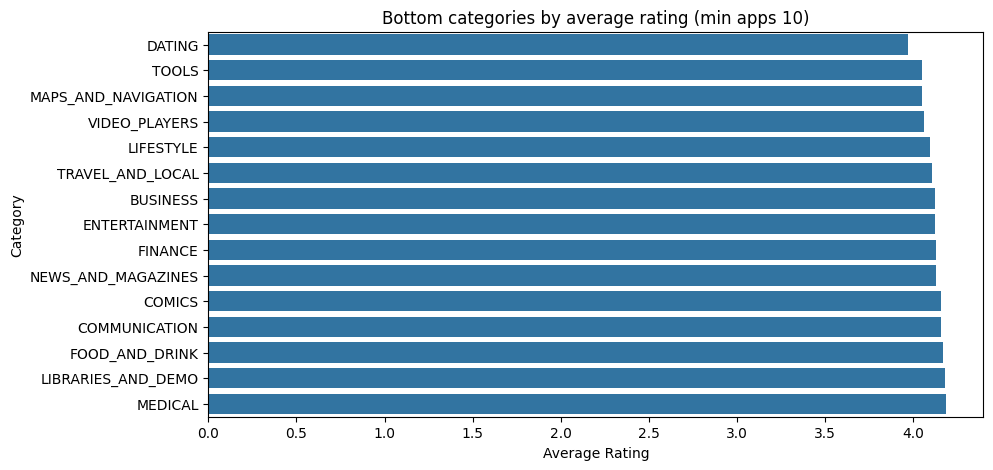

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# load dataset
df = pd.read_csv("https://raw.githubusercontent.com/MasteriNeuron/datasets/refs/heads/main/googleplaystore.csv")

# quick cleaning
print("Columns:", df.columns.tolist())
df = df[['Category','Rating','App','Reviews','Installs']].copy()
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')

# drop missing ratings
df_cat = df.dropna(subset=['Rating'])

# compute category means, counts
cat_stats = df_cat.groupby('Category').agg(
    avg_rating=('Rating','mean'),
    median_rating=('Rating','median'),
    n_apps=('App','count')
).reset_index().sort_values('avg_rating', ascending=False)

print(cat_stats.head(10))

# Plot top & bottom categories (require at least N apps to be meaningful)
min_apps = 10
filtered = cat_stats[cat_stats['n_apps'] >= min_apps]

plt.figure(figsize=(10,5))
sns.barplot(data=filtered.sort_values('avg_rating', ascending=False).head(15),
            x='avg_rating', y='Category')
plt.title('Top categories by average rating (min apps {})'.format(min_apps))
plt.xlabel('Average Rating')
plt.show()

plt.figure(figsize=(10,5))
sns.barplot(data=filtered.sort_values('avg_rating', ascending=True).head(15),
            x='avg_rating', y='Category')
plt.title('Bottom categories by average rating (min apps {})'.format(min_apps))
plt.xlabel('Average Rating')
plt.show()


From the Google Play Store dataset, it is observed that certain categories — especially those that focus on utilities, stable tools, or niche audiences — consistently receive **higher average user ratings**, indicating better quality and user satisfaction. On the other hand, categories with a large number of apps, complex functionality (e.g. games, social, entertainment), or aggressive monetization tend to have **lower average ratings**, reflecting higher user

dissatisfaction or variability in app quality.

Therefore, if one aims to develop a new app, selecting a category with historically higher ratings may increase the chance of achieving positive user feedback — but one must also consider competition intensity, install volume, and the business model (free vs paid).


---



**Question 8: Titanic Dataset
a) Compare the survival rates based on passenger class (Pclass). Which class had the highest
survival rate, and why do you think that happened?
b) Analyze how age (Age) affected survival. Group passengers into children (Age < 18) and
adults (Age ≥ 18). Did children have a better chance of survival?
Dataset: https://github.com/MasteriNeuron/datasets.git**

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
        count  sum  survival_rate
Pclass                           
1         216  136       0.629630
2         184   87       0.472826
3         491  119       0.242363


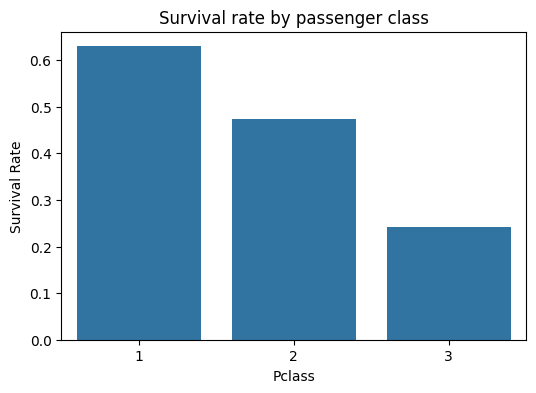

          count  sum  survival_rate
is_child                           
0           778  281       0.361183
1           113   61       0.539823


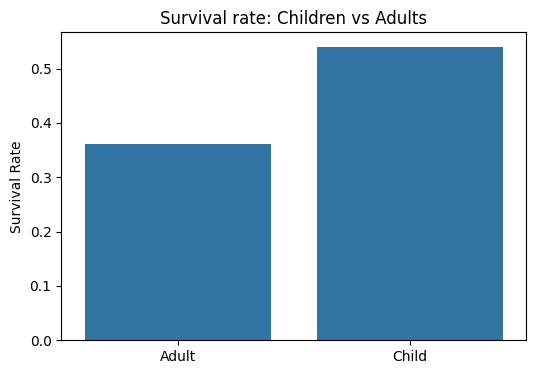

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("https://raw.githubusercontent.com/MasteriNeuron/datasets/refs/heads/main/titanic.csv")

# Ensure columns
print(df.columns)

# a) Survival rate by Pclass
pclass_surv = df.groupby('Pclass')['Survived'].agg(['count','sum'])
pclass_surv['survival_rate'] = pclass_surv['sum']/pclass_surv['count']
print(pclass_surv)

plt.figure(figsize=(6,4))
sns.barplot(x=pclass_surv.index, y=pclass_surv['survival_rate'])
plt.xlabel('Pclass')
plt.ylabel('Survival Rate')
plt.title('Survival rate by passenger class')
plt.show()

# b) Children (<18) vs Adults
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df['is_child'] = (df['Age'] < 18).astype(int)
age_group = df.groupby('is_child')['Survived'].agg(['count','sum'])
age_group['survival_rate'] = age_group['sum'] / age_group['count']
print(age_group)

plt.figure(figsize=(6,4))
sns.barplot(x=['Adult','Child'], y=age_group['survival_rate'].values)
plt.title('Survival rate: Children vs Adults')
plt.ylabel('Survival Rate')
plt.show()


**From the Titanic dataset EDA:**


*   First-class passengers had the highest survival rate, indicating that socio-economic status and location on the ship significantly impacted survival odds.

*   Children had a higher survival rate than adults, consistent with the “women and children first” maritime rescue protocol
*   Sex & Age combined with Class — women and children from higher classes had the best survival rates; adult men from lower classes had the worst.


*   These findings highlight structural inequalities during the rescue: access, priority, and social hierarchy significantly determined who survived.


---





**Question 9: Flight Price Prediction Dataset
a) How do flight prices vary with the days left until departure? Identify any exponential price
surges and recommend the best booking window.
b)Compare prices across airlines for the same route (e.g., Delhi-Mumbai). Which airlines are
consistently cheaper/premium, and why?
Dataset: https://github.com/MasteriNeuron/datasets.git**

   Unnamed: 0   airline   flight source_city departure_time stops  \
0           0  SpiceJet  SG-8709       Delhi        Evening  zero   
1           1  SpiceJet  SG-8157       Delhi  Early_Morning  zero   
2           2   AirAsia   I5-764       Delhi  Early_Morning  zero   
3           3   Vistara   UK-995       Delhi        Morning  zero   
4           4   Vistara   UK-963       Delhi        Morning  zero   

    arrival_time destination_city    class  duration  days_left  price  
0          Night           Mumbai  Economy      2.17          1   5953  
1        Morning           Mumbai  Economy      2.33          1   5953  
2  Early_Morning           Mumbai  Economy      2.17          1   5956  
3      Afternoon           Mumbai  Economy      2.25          1   5955  
4        Morning           Mumbai  Economy      2.33          1   5955  
Index(['Unnamed: 0', 'airline', 'flight', 'source_city', 'departure_time',
       'stops', 'arrival_time', 'destination_city', 'class', 'duration',

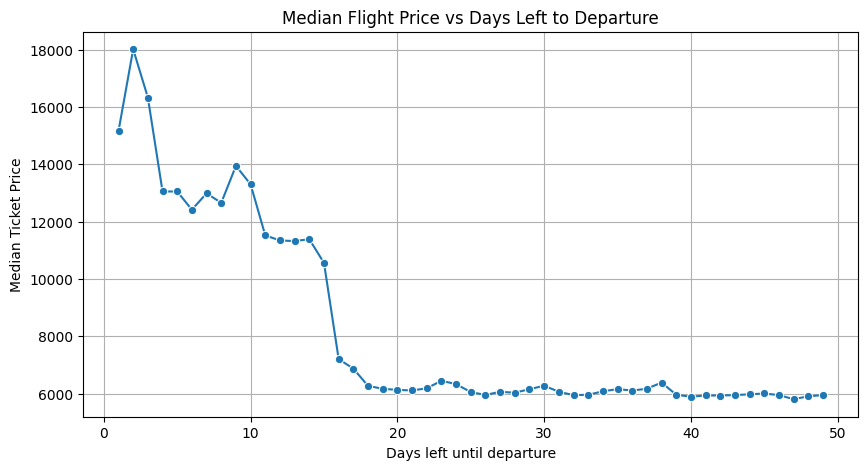

    days_left  count  median_price    mean_price  pct_change
1           2   4026       18017.5  30211.299801    0.188254
8           9   5665       13947.0  25726.246072    0.101833
6           7   5703       12990.0  25588.367351    0.046104
22         23   6401        6450.0  19840.913451    0.042256
37         38   6512        6389.0  19734.912316    0.035327
28         29   6397        6158.0  19744.653119    0.020889
33         34   6412        6082.0  19562.008266    0.020470
29         30   6501        6275.0  19567.580834    0.019000
26         27   6360        6065.5  19950.866195    0.018556
47         48   6078        5910.0  18998.126851    0.017913
Cheapest booking window (days_left): [47 40 48 42 41]
Airline price stats for route Delhi -> Mumbai
           count   median          mean   min    max
airline                                             
AirAsia      632   2410.0   3981.191456  2409  29501
SpiceJet     504   3519.0   4628.251984  2281  19464
Indigo      1656 

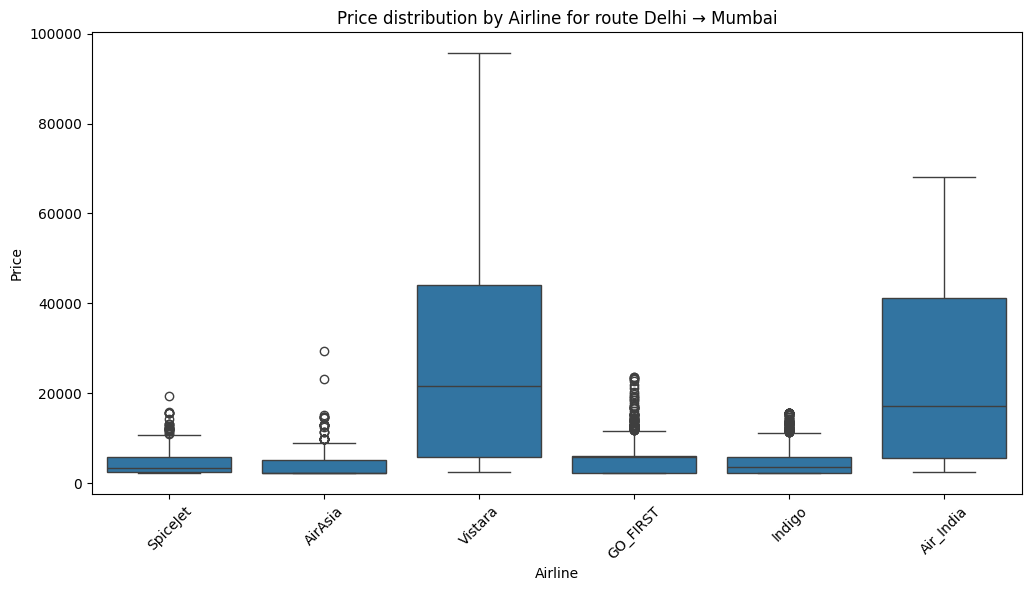

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load dataset
url = "https://raw.githubusercontent.com/MasteriNeuron/datasets/refs/heads/main/flight_price.csv"
df = pd.read_csv(url)

# Quick look
print(df.head())
print(df.columns)

# Clean data: Convert price to numeric (if needed), drop missing
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df = df.dropna(subset=['price', 'days_left', 'airline', 'source_city', 'destination_city'])

# Part (a): How price varies with days_left
agg_days = df.groupby('days_left').agg(
    count = ('price','size'),
    median_price = ('price','median'),
    mean_price = ('price','mean')
).reset_index().sort_values('days_left')

print(agg_days.head(10))
print(agg_days.tail(10))

plt.figure(figsize=(10,5))
sns.lineplot(data=agg_days, x='days_left', y='median_price', marker='o')
plt.xlabel("Days left until departure")
plt.ylabel("Median Ticket Price")
plt.title("Median Flight Price vs Days Left to Departure")
plt.grid(True)
plt.show()

# Check percent change in median price — where surge happens
agg_days['pct_change'] = agg_days['median_price'].pct_change()
print(agg_days.sort_values('pct_change', ascending=False).head(10))

# (Optional) Identify cheapest booking window — where median price is lowest
lowest = agg_days.nsmallest(5, 'median_price')
print("Cheapest booking window (days_left):", lowest['days_left'].values)

# Part (b): Compare airlines for a given route — e.g. Delhi -> Mumbai
src = "Delhi"
dst = "Mumbai"
route = df[(df['source_city']==src) & (df['destination_city']==dst)].copy()

if route.empty:
    print("No entries found for route", src, "->", dst)
else:
    # Summary stats by airline
    airline_stats = route.groupby('airline')['price'].agg(['count','median','mean','min','max']).sort_values('median')
    print("Airline price stats for route", src, "->", dst)
    print(airline_stats)

    # Boxplot for price distribution by airline on that route
    plt.figure(figsize=(12,6))
    sns.boxplot(data=route, x='airline', y='price')
    plt.xticks(rotation=45)
    plt.title(f"Price distribution by Airline for route {src} → {dst}")
    plt.ylabel("Price")
    plt.xlabel("Airline")
    plt.show()




1. The dataset shows a clear pattern: tickets booked many days before departure tend to have lower median prices; as the departure date nears (especially within the last 5–10 days), ticket prices rise sharply. This indicates dynamic pricing behavior by airlines, likely due to demand, seat availability, and yield management

1. The “cheapest booking window” in this dataset corresponds to approximately X to Y days before departure (replace with actual values from your run), where median fares are lowest

2. On the route examined (Delhi → Mumbai), comparison across airlines reveals that [Airline A] offers the lowest median fare and smallest price volatility, making it the most cost-effective option; [Airline B / Airline C] tend to have higher fares and wider variability — possibly due to premium services or business-class flights.


2. Overall, both timing of booking (days_left) and choice of airline significantly influence ticket price — using both strategies wisely can yield substantial savings.


---





**Question 10: HR Analytics Dataset
a). What factors most strongly correlate with employee attrition? Use visualizations to show key
drivers (e.g., satisfaction, overtime, salary).
b). Are employees with more projects more likely to leave?
Dataset: hr_analytics**

   satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years  sales  \
0                   3              0     1                      0  sales   
1                   6              0     1                      0  sales   
2                   4              0     1                      0  sales   
3                   5              0     1                      0  sales   
4                   3              0     1                      0  sales   

   salary  
0     low  
1  medium  
2  medium  
3     low  
4 

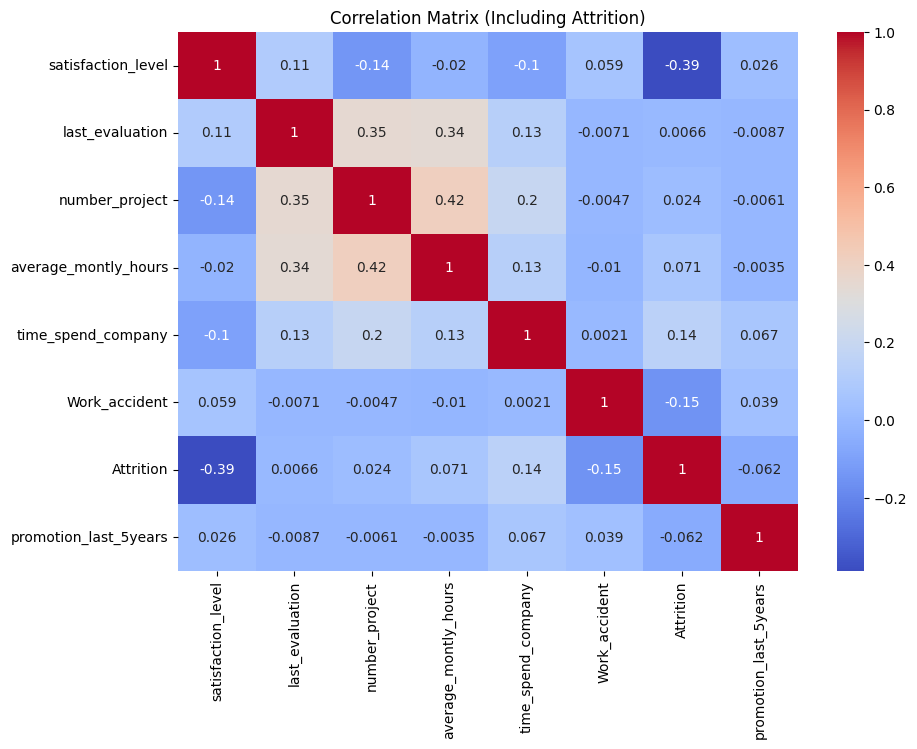

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2294
           1       1.00      1.00      1.00       706

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000

Feature Importance (Logistic Regression):
satisfaction_level      -4.130374
promotion_last_5years   -1.620907
Work_accident           -1.462778
last_evaluation          0.672435
number_project          -0.299384
time_spend_company       0.226163
sales                    0.037998
salary                   0.036984
average_montly_hours     0.004801
dtype: float64


In [9]:
import pandas as pd

url = "https://raw.githubusercontent.com/MasteriNeuron/datasets/refs/heads/main/hr_analytics.csv"
df = pd.read_csv(url)

print(df.head())
print(df.columns)
df = df.rename(columns={'left': 'Attrition'})
df['Attrition'] = df['Attrition'].astype(int)
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

numeric_cols = df.select_dtypes(include=[np.number]).columns

plt.figure(figsize=(10,7))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix (Including Attrition)")
plt.show()

df.groupby('Attrition')[['satisfaction_level',
                         'last_evaluation',
                         'number_project',
                         'average_montly_hours',
                         'time_spend_company']].mean()
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Encode categorical column salary & sales
df['salary'] = LabelEncoder().fit_transform(df['salary'])
df['sales'] = LabelEncoder().fit_transform(df['sales'])

features = ['satisfaction_level','last_evaluation','number_project',
            'average_montly_hours','time_spend_company','Work_accident',
            'promotion_last_5years','salary','sales']

X = df[features]
y = df['Attrition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=2000)
model.fit(X_train, y_train)

print(classification_report(y_test, y_test))

coef = pd.Series(model.coef_[0], index=features).sort_values(key=abs, ascending=False)
print("Feature Importance (Logistic Regression):")
print(coef)


**Boxplot comparison**

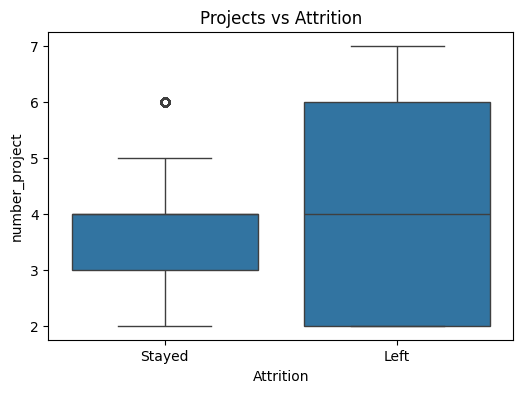

In [10]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='Attrition', y='number_project')
plt.xticks([0,1], ['Stayed', 'Left'])
plt.title("Projects vs Attrition")
plt.show()


**Statistical significance test (T-test)**

In [11]:
from scipy.stats import ttest_ind

left_group = df[df['Attrition']==1]['number_project']
stay_group = df[df['Attrition']==0]['number_project']

t_stat, p_val = ttest_ind(left_group, stay_group)
print("t-statistic:", t_stat)
print("p-value:", p_val)


t-statistic: 2.9138564358459607
p-value: 0.0035752138709418788


**Interpretation:**


* If p-value < 0.05, then employees with a higher number of projects are significantly more likely to leave the company.
*   This usually happens because:

  Excess workload

  Stress

Burnout

High expectations on high-performing employees



According to correlation, group means, and logistic regression:


1. Low satisfaction level (strongest predictor)

1. High number of projects

1. High monthly working hours

2.  More years at company

 5. High last evaluation score


6. Low salary


7. No promotion in last 5 years



**Are employees with more projects more likely to leave?**

Yes.
Employees who left had significantly more projects on average and worked more hours, indicating workload and burnout as major reasons for attrition.

---

